In [ ]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()

# 1.

# 2.

https://es-media-prod.s3.amazonaws.com/media/components/panels/spec-sheets/Tesla_T400H.pdf


Vi har valgt solpanelet Tesla T400H. Solpanelet har dimensionerne 1890x1046x40mm, og en peak power watts på 400W.

STC står for Standard Test Conditions, og er lavet til nemt at sammenligne forskellige solpaneler under samme betingelser. De 400W er målt ved 1000 W/m^2, 25°C og spektret AM1.5.


Vi har beregnet $\frac{W_p} {(L \cdot B)}$ til at være $202 \frac{W}{m^2}$

For at beregne hvor mange kWh og J panelet leverer under $1100\frac{W}{m^2}$, ganges den målte watt ved $1000\frac{W}{m^2}$ med 1.1.

$400W \cdot 1.1 \cdot 60s = 26400J = 0.0073kWh$

For at finde energien pr. areal divideres nu med arealet af panelet.

$7.3Wh/(1.89m\cdot 1.046m)=3.693Wh/m^2$




In [ ]:
wpLB = 400/(1.89*1.046)
print(wpLB)

202.33289831760194


# 3.

# 4.

Hvis vi forstiller os at fladen har en konstant normal vektor $n_F$ og V er konstant grundet dets vektorer $S_0$ har konstant længde.

Herudover kan vi parametisere området $r(\Gamma)$ ved: $r(u,v) = (u,v,0)$

Så kan vi opsætte integralet:
$$\max{\left(<V\left(u,v\right),n_F>,\ 0\right)}\int_{L}{\int_{B}1\ dvdu\cdot A_0}$$

Ifølge antagelserne, er solpanelet beskrevet ved en flade $\mathcal{F} = \pmb{r}(\Gamma)$, hvor $\pmb{r} : \Gamma \to \mathbb{R}^3$ er parametriseringen af fladen:

$$
\pmb{r}(u, v) =
\begin{bmatrix}
u \\
v \\
0
\end{bmatrix}
, \quad \Gamma = [0, L] \times [0, B]
$$

Nu kan fladens normalvektor udregnes:

$$
\pmb{n}_{\mathcal{F}}(u, v) = \pmb{r}_{u}'(u, v) \times \pmb{r}_{v}'(u, v) =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$$

dernæst findes normen af normalvektoren:

$$
\| \pmb{n}_{\mathcal{F}}(u, v) \| = \sqrt{\pmb{n}_{\mathcal{F}}^{T}  \cdot \pmb{n}_{\mathcal{F}}} = 1
$$

hvorefter enhedsnormalvektoren kan udregnes:

$$
\pmb{u}_p = \frac{\pmb{n}_{\mathcal{F}}(u, v)}{\| \pmb{n}_{\mathcal{F}}(u, v) \|} =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$$

Ifølge [Definition 7.5.1](https://01002.compute.dtu.dk/_assets/notesvol2.pdf#page=193) kan nu man opsætte en formel for fluxen gennem fladen $\mathcal{F}$:

$$
\int_{\mathcal{F}} \pmb{V} \cdot \mathrm{d} \pmb{S} = \max \left\{ \int_{\Gamma} \langle \pmb{V}_S(\pmb{r}(u, v)) \cdot A_0, \pmb{u}_{p} \rangle \, \mathrm{d}(u, v), 0 \right\}
$$

Hvis vinklen mellem enhedsnormalvektor af solpanelet, $\pmb{u}_p$, og solens vektorfelt $\pmb{V}_S$ er over $\pi/2$ ($90^\circ$), så lyser solen på bagsiden af solpanelet. Effekten kan _aldrig_ blive negativ, og dermed gælder det også at fluxen ikke kan blive negativ. I forhold til fluxen betyder dette at indre-produktet mellem $\pmb{V}$ og $\pmb{u}_p$ ikke kan være lavere end 0, derfor anvendes $\max$-funktionen.

Da enhedsnormalvektoren, $\pmb{n}_{\mathcal{F}}$, er konstant kan man slippe af med integraltegnet, og udtrykke formlen på følgende måde:

$$
\int_{\mathcal{F}} \pmb{V} \cdot \mathrm{d} \pmb{S} = \max\{ \langle \pmb{V}_S(\pmb{r}(u, v)) \cdot A_0, \pmb{u}_{p} \rangle, 0 \} \cdot \int_{0}^{L} \int_{0}^{B} 1 \, \mathrm{d}(u, v)
$$

# 5.

Vinkel (V): Beskriver den vinkel der dannes mellem penelet og jorden. Kan fortolkes som insstalationens hældning ($\theta$)

Panelets Længde (L): Meter (m)

Panelets bredde (B): Meter (m)

Areal (A0): Koefficient der angiver den egentlige indståling der rammer solpanelet (Enhedsløs)

Fluxen: Watt per kvadratmeter (W/m²)

Energi: Joule (J)

Sammenhængen mellem Joule (J) og Kilowatt-time (kWh):
1 kWh = 3.600.000 J

# 6.

# 7. og 8.

In [ ]:
t = np.linspace(-20, 20, 1000)
f = np.cos(t)

def sign_change(f):
    a = np.diff(np.sign(f))
    neg_sign_idx = np.argwhere(a<0).flatten()+1 # indexes where neg sign change
    pos_sign_idx = np.argwhere(a>0).flatten()+1 # indexes where pos sign change

    return neg_sign_idx, pos_sign_idx

neg_signs, pos_signs = sign_change(f)

display(f"f skifter fra positiv til negativ ved disse indexer: {neg_signs}")
display(f"Værdier ved disse indexer: {f[neg_signs]}")
print()
display(f"f skifter fra negativ til positiv ved disse indexer: {pos_signs}")
display(f"Værdier ved disse indexer: {f[pos_signs]}")

# Disse værdier er meget tæt på 0. Vi kan komme endnu tættere på hvis vi tager flere t-værdier.

'f skifter fra positiv til negativ ved disse indexer: [ 68 225 382 539 696 853]'

'Værdier ved disse indexer: [-0.00148232 -0.00458328 -0.0076842  -0.01078505 -0.01388579 -0.0169864 ]'

'f skifter fra negativ til positiv ved disse indexer: [147 304 461 618 775 932]'

'Værdier ved disse indexer: [0.02305079 0.02615082 0.02925061 0.03235012 0.03544931 0.03854817]'

# 9.

# 10.

Solen har ikke en fast afstand til jorden, da jorden er i en ellipseformet bane om solen, men den gennemsnitlige afstand til jorden er $149.60 \cdot 10^6 \, \text{km}$ ([kilde](https://www.vildmedrummet.dk/solsystemet/solen/fakta-om-solen/)), derfor fastlægges en radius:

$$
r_s = 149.60 \cdot 10^6 \, \text{km}
$$

Nu kan man anvende de sfæriske koordinater fra ([6.78](https://01002.compute.dtu.dk/_assets/notesvol2.pdf#eq%3Aspherical-coordinates)) til at parametrisere solens punkt ($xyz$-koordinat) i rummet vha. $r_s$, $\theta_s$ og $\phi_s$:

$$
\pmb{s}(r_s, \theta_s, \phi_s) =
\begin{bmatrix}
r_s \cdot \sin(\theta_s) \cdot \cos(\phi_s) \\
r_s \cdot \sin(\theta_s) \cdot \sin(\phi_s) \\
r_s \cdot \cos(\theta_s)
\end{bmatrix}
, \quad (\theta_s, \phi_s) \in [0, \pi] \times [0, 2\pi]
$$

Da $r_s$ er fastlagt kan ovenstående "reduceres" til en funktion af to variable:

$$
\pmb{s}(\theta_s, \phi_s) =
\begin{bmatrix}
149.60 \cdot 10^6 \cdot \sin(\theta_s) \cdot \cos(\phi_s) \\
149.60 \cdot 10^6 \cdot \sin(\theta_s) \cdot \sin(\phi_s) \\
149.60 \cdot 10^6 \cdot \cos(\theta_s)
\end{bmatrix}
, \quad (\theta_s, \phi_s) \in [0, \pi] \times [0, 2\pi]
$$

> Det er muligt at intervallerne skal ændres, da det kan være at man kun skal betragte den i:
> - en andendel af sfæren (4/8 af oktanten), dvs. $(\theta_s, \phi_s) \in [0, \pi/2] \times [0, 2\pi]$
> - en fjerdedel af sfæren (2/8 af oktanten), dvs. $(\theta_s, \phi_s) \in [0, \pi/2] \times [0, \pi]$

# 11.

Note: måske man skal konvertere fra kartesiske til sfæriske koordinater, se evt. [her](https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/7%3A_Vector_Spaces/5.7%3A_Cylindrical_and_Spherical_Coordinates#MathJax-Span-1339).

In [ ]:
# Solpanel
r_p, theta_p, phi_p = symbols("r_p, theta_p, phi_p")
r_p = 1

s_p = Matrix([
    sin(theta_p) * cos(phi_p),
    sin(theta_p) * sin(phi_p),
    cos(theta_p)
])

n_p = simplify(diff(s_p, theta_p).cross(diff(s_p, phi_p)))

# Solens placering
r_s, theta_s, phi_s = symbols("r_s, theta_s, phi_s")

s_s = Matrix([
    sin(theta_s) * cos(phi_s),
    sin(theta_s) * sin(phi_s),
    cos(theta_s)
])
simplify(s_s.dot(s_p))


sin(θₚ)⋅sin(θₛ)⋅cos(φₚ - φₛ) + cos(θₚ)⋅cos(θₛ)

Bruges parametriseringen af sfæren fra tidligere som en skabelon, kan man netop udtrykke:

$$
\begin{align*}
\pmb{n}_p(\theta_p, \phi_p)
&= \pmb{s}_{\theta_p}'(\theta_p, \phi_p) \times \pmb{s}_{\phi_p}'(\theta_p, \phi_p) \\
&= \begin{bmatrix}2 r_{p}^{2} \sin{\left(\theta_{p} \right)} \cos{\left(\phi_{p} \right)} \cos{\left(\theta_{p} \right)}\\2 r_{p}^{2} \sin{\left(\phi_{p} \right)} \sin{\left(\theta_{p} \right)} \cos{\left(\theta_{p} \right)}\\r_{p}^{2} \cos{\left(2 \theta_{p} \right)}\end{bmatrix}
\times
\begin{bmatrix}- r_{p}^{2} \sin{\left(\phi_{p} \right)} \sin^{2}{\left(\theta_{p} \right)}\\r_{p}^{2} \sin^{2}{\left(\theta_{p} \right)} \cos{\left(\phi_{p} \right)}\\0\end{bmatrix} \\
&= \begin{bmatrix}r_{p}^{2} \sin^{2}{\left(\theta_{p} \right)} \cos{\left(\phi_{p} \right)}\\r_{p}^{2} \sin{\left(\phi_{p} \right)} \sin^{2}{\left(\theta_{p} \right)}\\\frac{r_{p}^{2} \sin{\left(2 \theta_{p} \right)}}{2}\end{bmatrix}
\end{align*}
$$

hvor $(\theta_p, \phi_p) \in [0, \pi/2] \times [0, 2\pi]$.

Normaliseres ovenstående, fås:

$$
\begin{align*}
\| \pmb{n}_p(\theta_p, \phi_p) \|
&= \sqrt{r_{p}^{4} \sin^{2}{\left(\phi_{p} \right)} \sin^{4}{\left(\theta_{p} \right)} + r_{p}^{4} \sin^{4}{\left(\theta_{p} \right)} \cos^{2}{\left(\phi_{p} \right)} + \frac{r_{p}^{4} \sin^{2}{\left(2 \theta_{p} \right)}}{4}}\\
&= r_{p}^{2} \left|{\sin{\left(\theta_{p} \right)}}\right| \\
&= r_{p}^{2} {\sin{\left(\theta_{p} \right)}}
\end{align*}
$$

Bemærk her at $\theta_p \in [0, \pi/2]$, så $\sin$-funktionen kan aldrig outputte negative værdier, derfor undlades absolutværdi.

Nu kan enhedsnormalvektoren defineres:
$$
\pmb{u}_p = \frac{\pmb{n}_p(\theta_p, \phi_p)}{\|\pmb{n}_p(\theta_p, \phi_p)\|}
=
\frac{1}{r_{p}^{2} {\sin{\left(\theta_{p} \right)}}} \cdot
\begin{bmatrix}r_{p}^{2} \sin^{2}{\left(\theta_{p} \right)} \cos{\left(\phi_{p} \right)}\\r_{p}^{2} \sin{\left(\phi_{p} \right)} \sin^{2}{\left(\theta_{p} \right)}\\\frac{r_{p}^{2} \sin{\left(2 \theta_{p} \right)}}{2}\end{bmatrix}
=
\begin{bmatrix}\sin{\left(\theta_{p} \right)} \cos{\left(\phi_{p} \right)}\\\sin{\left(\phi_{p} \right)} \sin{\left(\theta_{p} \right)}\\\cos{\left(\theta_{p} \right)}\end{bmatrix}
$$

Vi har de følgende 2 vektorer:
$$
\pmb{u}_p = \begin{pmatrix}
\sin(\theta_p) \cos(\phi_p), \
\sin(\theta_p) \sin(\phi_p), \
\cos(\theta_p)
\end{pmatrix}
$$

$$
\pmb{u}_s = \begin{pmatrix}
\sin(\theta_s) \cos(\phi_s), \
\sin(\theta_s) \sin(\phi_s) ,\
\cos(\theta_s)
\end{pmatrix}
$$

Nu findes det indre produkt:

$$
\langle \pmb{u}_s, \pmb{u}_p \rangle = \cos(\theta_p) \cos(\theta_s) + \sin(\theta_p) \sin(\theta_s) \cos(\phi_p - \phi_s)
$$

$$
⇒ \cos(\theta_p) \cos(\theta_s) - \sin(\theta_p) \sin(\theta_s) + \sin(\theta_p) \sin(\theta_s)+ \sin(\theta_p) \sin(\theta_s) \cos(\phi_p - \phi_s)
$$

$$
\Rightarrow \cos(\theta_p-\theta_s) + \sin(\theta_p) \sin(\theta_s)+ \sin(\theta_p) \sin(\theta_s) \cos(\phi_p - \phi_s)
$$

$$
\Rightarrow \cos(\theta_p-\theta_s) + \sin(\theta_p)(\sin(\theta_s) \cos(\phi_p - \phi_s)-\sin(\theta_s))
$$

Nu har vi udtrykket $\cos(\theta_p-\theta_s)$ og de ønskede 5 trigonomiske funktioner.

Vi kan vise at det indre produkt af de to vektorer er mellem -1 og 1 ved at betragte to vektorer $\mathbf{u}$ og $\mathbf{v}$ i et tre-dimensionelt vektorrum med længde 1.

 Det indreproduktet mellem $\mathbf{u}$ og $\mathbf{v}$ er givet ved:

$ \langle \mathbf{u} , \mathbf{v} \rangle = |\mathbf{u}| |\mathbf{v}| \cos(\theta) $

Hvor $|\mathbf{u}|$ og $|\mathbf{v}|$ er længden af de to vektorer, og $\theta$ er vinklen mellem dem.

Da længden af hver vektor er 1, har vi $|\mathbf{u}| = |\mathbf{v}| = 1$.

Dette reducerer indreproduktet til:

$ \langle \mathbf{u} , \mathbf{v} \rangle = \cos(\theta) $

Vi ved, at værdierne af $\cos(\theta)$ ligger mellem $-1$ og $1$.

Så konklusionen er, at indreproduktet mellem to vektorer med længde 1 i et tre-dimensionelt rum altid vil ligge mellem $-1$ og $1$.


Når det indre produkt er negativt betyder det at vinklen mellem de to er over 90 grader hvilket medfører at panelet ikke rammes af nogle sålstråler på dens overflade der kan omdanne ståling til sol.

# 12.

In [ ]:
#12

import numpy as np
from sympy import *
init_printing()

#ns = normalvektor sol
#np = normalvektor panel

def solar_panel_projection(theta_sol,phi_sol,theta_panel,phi_panel):

    theta, phi, r = symbols("theta phi r", real = True)

    #r = 149.60e6

    #Solens Parameter
    sol_parameter = Matrix([r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta)])

    normal_sol = sol_parameter.diff(theta).cross(sol_parameter.diff(phi))

    #normal_sol.subs({theta:theta_sol,phi:phi_sol})

    #Panelets Parameter
    panel_parameter = Matrix([r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta)])

    normal_panel = (panel_parameter).cross(panel_parameter.diff(phi))

    #normal_panel.subs({theta:theta_panel,phi:phi_panel})

    #Kryds dem
    krydset = simplify(normal_sol.dot(normal_panel))

    if krydset > 0:
      return krydset
    return 0

theta_sol = 16
phi_sol = 1
theta_panel = 3
phi_panel = 6

solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel)



0

In [ ]:
def solar_panel_projection_sp(theta_sol, phi_sol, theta_panel, phi_panel):
    theta, phi, r = symbols("theta, phi, r")
    theta_s, phi_s, r_s = symbols("theta_s, phi_s, r_s")
    theta_p, phi_p, r_p = symbols("theta_p, phi_p, r_p")

    # Sfærsike koordinater
    s = Matrix([
        [r * sin(theta) * cos(phi)],
        [r * sin(theta) * sin(phi)],
        [r * cos(theta)]
    ])

    # Parametriseringer
    s_s = s.subs({theta: theta_s, phi: phi_s, r: r_s})
    p_s = s.subs({theta: theta_p, phi: phi_p, r: r_p})

    # Normalvektorer
    n_s = diff(s_s, theta_s).cross(diff(s_s, phi_s))
    n_p = diff(p_s, theta_p).cross(diff(p_s, phi_p))

    # Jacobi-determinant (Lemma 7.1.1)
    J_s = (s_s.jacobian([r_s, theta_s, phi_s])).det()
    J_p = (p_s.jacobian([r_p, theta_p, phi_p])).det()

    # Enhedsnormalvektorer
    u_s = (1/J_s * n_s).applyfunc(simplify)
    u_p = (1/J_p * n_p).applyfunc(simplify)

    # Prikprodukt
    dot_ps = (u_s.dot(u_p)).subs({
        theta_s: theta_sol,
        phi_s: phi_sol,
        theta_p: theta_panel,
        phi_p: phi_panel
    })

    return Max(dot_ps.evalf(), 0)

#solar_panel_projection_sp(theta_s, phi_s, theta_s, phi_s)
solar_panel_projection_sp(theta_sol, phi_sol, theta_panel, phi_panel)

0.936550812041092

In [ ]:
theta_sol = np.array([np.pi / 4, np.pi / 2, 0.0])
phi_sol = np.array([np.pi, np.pi / 2, 0.0])
theta_panel = np.array([0.0, np.pi / 2, np.pi])
phi_panel = np.array([np.pi, 0.0, 0.0])
solar_panel_projection_sp(theta_sol,phi_sol,theta_panel,phi_panel)

SympifyError: SympifyError: array([0.78539816, 1.57079633, 0.        ])

# 13.

I realiteten skal de normaliseres. Der afventes svar på opgave 11. Nedenstående er allerede normaliseret, men der mangler et trin.

In [ ]:
def np_dot(v1, v2):
    return np.sum(v1 * v2, axis=0)

def solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel):
    #r_s = 149.60 * 10**6 # radius (afstand fra jorden til solen)
    r_s = 1

    # Enhedsnormalvektor, sol
    u_s = np.array([
        r_s * np.sin(theta_sol) * np.cos(phi_sol),
        r_s * np.sin(theta_sol) * np.sin(phi_sol),
        r_s * np.cos(theta_sol)
    ])

    # Enhedsnormalvektor, panel
    u_p = np.array([
        np.sin(theta_panel) * np.cos(phi_panel),
        np.sin(theta_panel) * np.sin(phi_panel),
        np.cos(theta_panel)
    ])

    return np.maximum(0, np_dot(u_s, u_p))

# 14.

In [ ]:
%pip install pvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 32.1 MB/s eta 0:00:00


In [ ]:
import pvlib
import pandas as pd
# Byg 101 koordinater
lat = 55.786256
lon = 12.523167
time = "Europe/Copenhagen"
alt = 40
location = pvlib.location.Location(lat,lon,time,alt,"DTU-101")
location

Location: 
  name: DTU-101
  latitude: 55.786256
  longitude: 12.523167
  altitude: 40
  tz: Europe/Copenhagen

# 15.

In [ ]:
# 15
import pandas as pd
import pvlib
from pvlib.location import Location

#Time data
tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-04-30"
delta_tid = "Min"  # "Min", "H",

# Byg 101 koordinater
lat = 55.786256
lon = 12.523167
time = "Europe/Copenhagen"
alt = 40
location = pvlib.location.Location(lat,lon,time,alt,"DTU-101")

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)

# Estimate Solar Position with the 'Location' object
solpos = location.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-04-01 00:00:00+02:00,117.721237,117.721237,-27.721237,-27.721237,339.130628,-3.866396
2024-04-01 00:01:00+02:00,117.770744,117.770744,-27.770744,-27.770744,339.406633,-3.866190
2024-04-01 00:02:00+02:00,117.819617,117.819617,-27.819617,-27.819617,339.682907,-3.865984
2024-04-01 00:03:00+02:00,117.867853,117.867853,-27.867853,-27.867853,339.959447,-3.865777
2024-04-01 00:04:00+02:00,117.915451,117.915451,-27.915451,-27.915451,340.236250,-3.865571


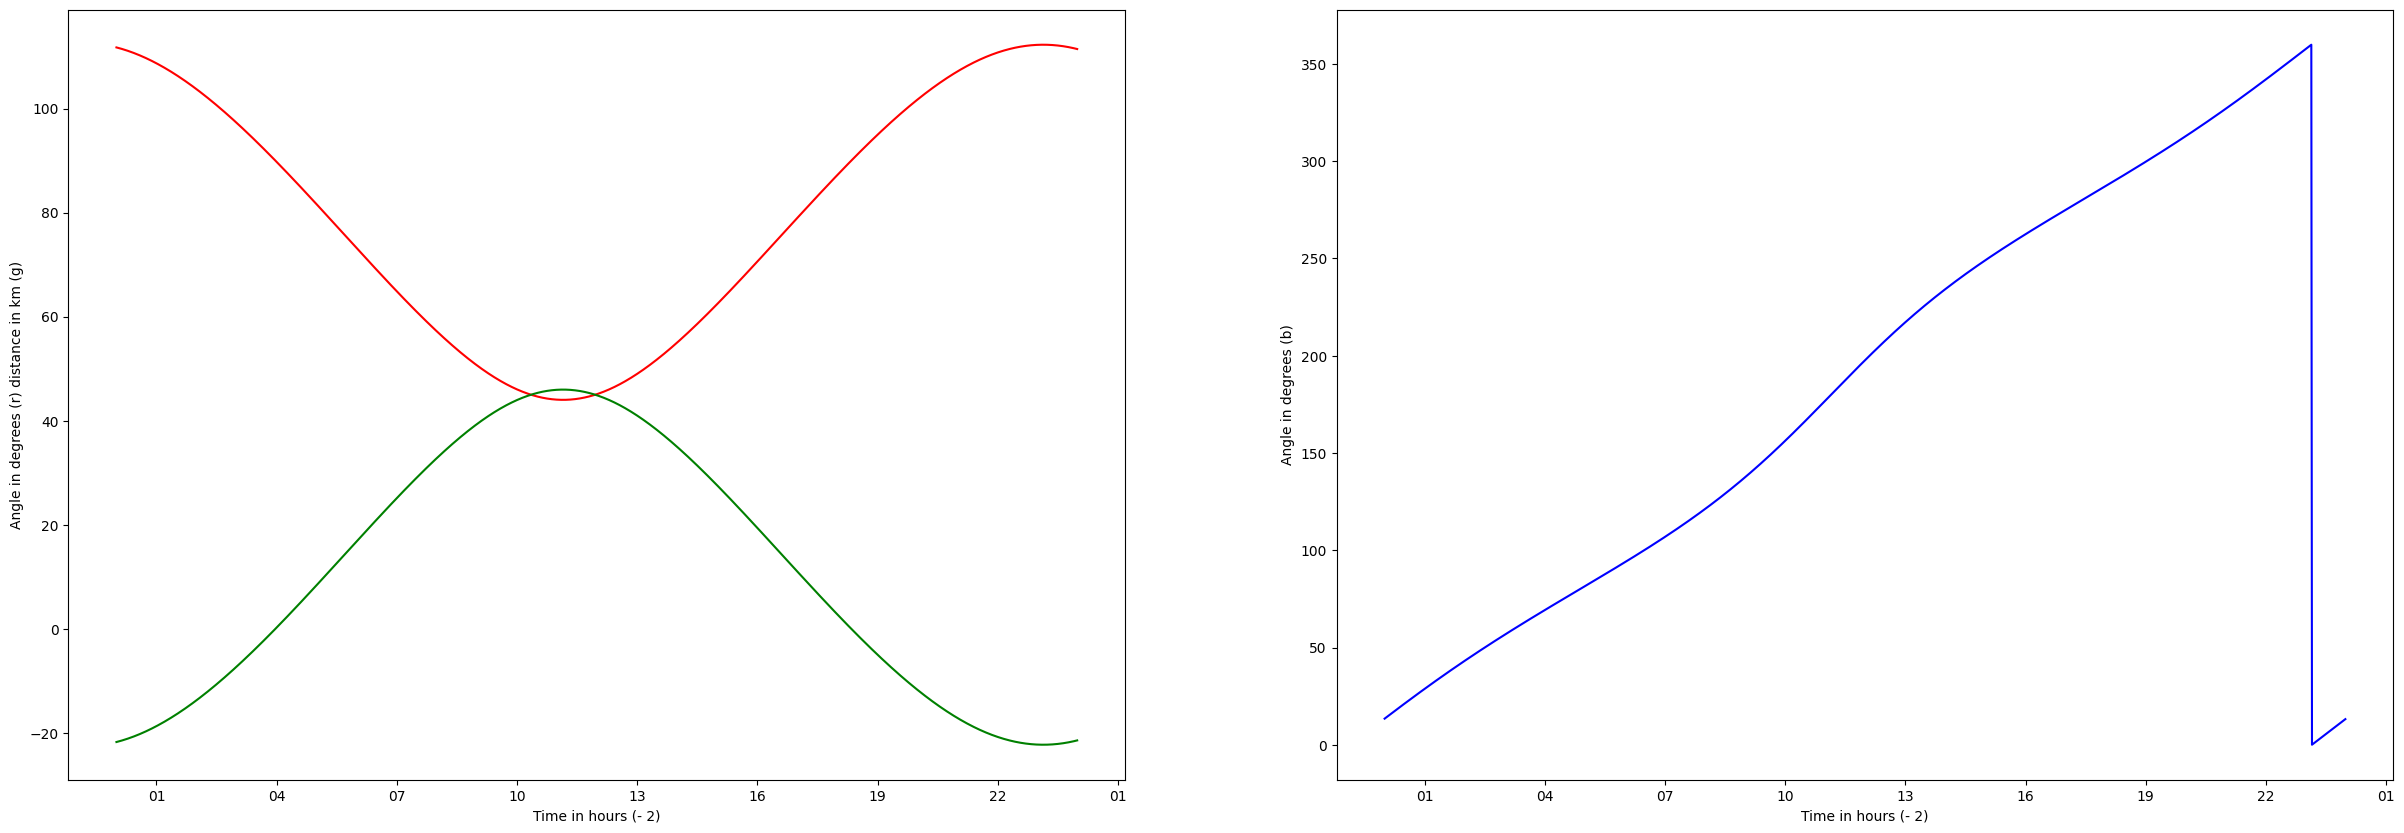

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pvlib.location import Location

# 15 plot
start_dato_20 = "2024-04-20"
slut_dato_20 = "2024-04-21"
delta_tid = "Min"  # "Min", "H",
tidszone = "Europe/Copenhagen"

time_20 = pd.date_range(
    start_dato_20 + " 02:00:00", slut_dato_20 + " 02:00:00", inclusive="left", freq=delta_tid, tz=tidszone
)
solpos_20 = location.get_solarposition(time_20)

fig, (p1, p2) = plt.subplots(1, 2, figsize=(30, 10))
#Plot zenith + elevation
p1.plot(solpos_20.zenith,color="r")
p1.plot(solpos_20.elevation,color="g")
p1.set_xlabel("Time in hours (- 2)")
p1.set_ylabel("Angle in degrees (r) distance in km (g)")
p1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

#Plot azimuth
p2.plot(solpos_20.azimuth,color="b")
p2.set_xlabel("Time in hours (- 2)")
p2.set_ylabel("Angle in degrees (b)")
p2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

#fig.show()

# 16.

# 17.

In [ ]:
def sunup_sundown(solpos):
  sun_down, sun_up = sign_change(solpos.apparent_elevation)
  print(f"Solen står op mellem {solpos.iloc[sun_up-1].index[0].strftime('%H:%M')} og {solpos.iloc[sun_up].index[0].strftime('%H:%M')}")
  print(f"Solen går ned mellem {solpos.iloc[sun_down-1].index[0].strftime('%H:%M')} og {solpos.iloc[sun_down].index[0].strftime('%H:%M')}")


sunup_sundown(solpos_20)

Solen står op mellem 05:53 og 05:54
Solen går ned mellem 20:25 og 20:26


Solen står op 5.51 og går ned 20:27 i Lyngby ifølge DMI.

Der er altså nogle minutters forskel, men det er nogenlunde det samme.

# 18.

In [ ]:
# 18

#Vi vælger at kigge på et interval omkring sommersolhverv, da det ikke er et specifikt tidspunkt, men en specifik hændelse der sker omkring et tidspunkt
start_dato_solstice = "2023-07-19"
slut_dato_solstice = "2023-07-22"

# Simuler / hent simuleringsdata
time_solstice = pd.date_range(
    start_dato_solstice + " 00:00:00", slut_dato_solstice + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)
solpos_solstice = location.get_solarposition(time_solstice)

#Minimums værdien er zenith er tilsvarende til hvornår solen er højest, dermed er zenith vinklen når den er højest:
solhverv_zenith = solpos_solstice['zenith'].min()
solhverv_dato = solpos_solstice['zenith'].idxmin()

print(f'Dermed findes der en zenith vinkel på')
display(solhverv_zenith)
print(f'Som findes ved tidspunktet')
solpos_solstice['zenith'].idxmin()

Dermed findes der en zenith vinkel på


34.945110739579526

Som findes ved tidspunktet


Timestamp('2023-07-19 13:16:00+0200', tz='Europe/Copenhagen')

# 19.

In [ ]:
def sun_max_point(date, coordinates:tuple):

    # Tjek om der er længdegrad med
    if type(coordinates) is tuple:
        lat, lon = coordinates
    else:
        lat = coordinates
        lon = 0

    time_zone = "Europe/Copenhagen"
    delta_tid = "Min"

    site = Location(lat, lon, time_zone)

    # Definition af tidspunkter
    times = pd.date_range(
        date + " 00:00:00", date + " 23:59:00", inclusive="left", freq=delta_tid, tz=time_zone
    )

    # Estimer solposition med Location-objektet
    solpos = site.get_solarposition(times)

    # Find tidspunktet og værdien for højeste elevationsvinkel
    elev_max_idx = solpos['elevation'].idxmax()
    alpha_max = solpos['elevation'].max()
    max_time = elev_max_idx.strftime("%H:%M:%S")

    return alpha_max, max_time

# 20.

In [ ]:
def sun_xyz(zenith,azimut):
  r = 149.6e6
  rad_z = np.deg2rad(zenith)
  rad_a = np.deg2rad(azimut)
  matrix_list = []
  for z,a in zip(rad_z,rad_a):
    matrix_list.append(Matrix([r*sin(z*cos(a)),r*sin(z)*sin(a),r*cos(z)]))
  return matrix_list

#sun_xyz(solpos_20.zenith.to_numpy(),solpos_20.azimuth.to_numpy())

# 21.

In [ ]:
def xyz2zenazi(x,y,z):
    #r = pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700 # Mest nøjagtige radius, til gengæld er det tidsbestemt
    r = 149.60 * 10**6
    azi = np.arctan2(y, x)
    azi = (azi + 2 * np.pi) % (2 * np.pi)
    zen = np.arccos(z / r)

    return np.rad2deg(zen), np.rad2deg(azi)

# 22.

In [ ]:
def find_flux(solpos,theta_p,phi_p):
  flux_list = []
  for z,a in zip(solpos["zenith"],solpos["azimuth"]):
    if z > 90:
      flux_list.append(0)
    else:
      flux_list.append(solar_panel_projection(np.deg2rad(z),np.deg2rad(a),np.deg2rad(theta_p),np.deg2rad(phi_p)))
  return flux_list

# 23.

In [ ]:
from scipy import integrate
A_0 = 0.5
S_0 = 1100
W_peak = 400
L = 1.89
B = 1.046 # 12 paneler med disse dimensioner
I_peak = W_peak / (L * B)
n_p = 12

dx = 60
deg_list =[]
kWh_list =[]
for deg in range(1,90+1):
  flux = find_flux(solpos_20,deg,180)
  integrate_value = integrate.simps(flux,dx=dx)*I_peak*A_0 # joules
  integrate_value = integrate_value/(3600 * 1000) # kWh
  print(f"kWh produceret ved {deg}°: {round(integrate_value,2)}")
  deg_list.append(deg)
  kWh_list.append(integrate_value)


#plot
plt.plot(deg_list, kWh_list, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Theta_panel')
plt.ylabel('Daily Energy Production 4/20')
plt.title('Energy Production by angle')

# Display the plot
plt.grid(True)
plt.show()

NameError: name 'find_flux' is not defined

kWh produceret ved 1°: 0.72
kWh produceret ved 2°: 0.73
kWh produceret ved 3°: 0.74
kWh produceret ved 4°: 0.75
kWh produceret ved 5°: 0.75
kWh produceret ved 6°: 0.76
kWh produceret ved 7°: 0.77
kWh produceret ved 8°: 0.78
kWh produceret ved 9°: 0.78
kWh produceret ved 10°: 0.79
kWh produceret ved 11°: 0.8
kWh produceret ved 12°: 0.8
kWh produceret ved 13°: 0.81
kWh produceret ved 14°: 0.81
kWh produceret ved 15°: 0.82
kWh produceret ved 16°: 0.82
kWh produceret ved 17°: 0.83
kWh produceret ved 18°: 0.83
kWh produceret ved 19°: 0.84
kWh produceret ved 20°: 0.84
kWh produceret ved 21°: 0.85
kWh produceret ved 22°: 0.85
kWh produceret ved 23°: 0.85
kWh produceret ved 24°: 0.86
kWh produceret ved 25°: 0.86
kWh produceret ved 26°: 0.86
kWh produceret ved 27°: 0.87
kWh produceret ved 28°: 0.87
kWh produceret ved 29°: 0.87
kWh produceret ved 30°: 0.87
kWh produceret ved 31°: 0.87
kWh produceret ved 32°: 0.87
kWh produceret ved 33°: 0.88
kWh produceret ved 34°: 0.88
kWh produceret ved 35°: 0

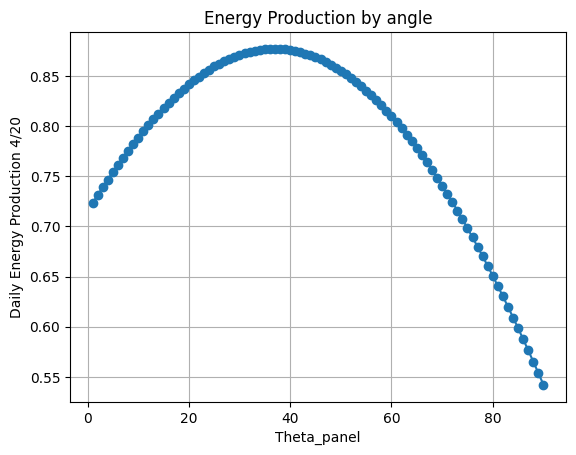

In [ ]:
from scipy import integrate
A_0 = 0.5
S_0 = 1.1
Wp = 400 #Vores panel der giver 400W
LB = 1.89*1.046 # 12 paneler med disse dimensioner
dx = 60
deg_list =[]
kWh_list =[]
for deg in range(1,91):
  flux = find_flux(solpos_20,deg,180)
  integrate_value = integrate.simps(flux,dx=dx)*A_0*S_0*Wp/LB/1000/3600
  print(f"kWh produceret ved {deg}°: {round(integrate_value,2)}")
  deg_list.append(deg)
  kWh_list.append(integrate_value)


#plot
plt.plot(deg_list, kWh_list, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Theta_panel')
plt.ylabel('Daily Energy Production 4/20')
plt.title('Energy Production by angle')

# Display the plot
plt.grid(True)
plt.show()

# 24.

In [ ]:
# Helårs data

start_dato_år = "2024-01-01"
slut_dato_år = "2024-12-31"

time_år = pd.date_range(
    start_dato_år + " 00:00:00", slut_dato_år + " 23:59:59", inclusive="left", freq="H", tz="Europe/Copenhagen"
)
solpos_år = location.get_solarposition(time_år)

def find_flux_pr_asi_år():
    deg_flux_dict = {}
    dx = 3600
    for deg in range(25, 60):
        flux_2024 = find_flux(solpos_år, deg, 180)
        integrate_value = integrate.simps(flux_2024,dx=dx)*A_0*S_0*Wp/LB/1000/3600
        deg_flux_dict[deg] = round(integrate_value,2)
    return deg_flux_dict

print(find_flux_pr_asi_år())

{25: 257.58, 26: 259.63, 27: 261.61, 28: 263.51, 29: 265.35, 30: 267.11, 31: 268.82, 32: 270.45, 33: 272.01, 34: 273.48, 35: 274.87, 36: 276.17, 37: 277.4, 38: 278.53, 39: 279.59, 40: 280.56, 41: 281.44, 42: 282.24, 43: 282.96, 44: 283.6, 45: 284.15, 46: 284.62, 47: 285.01, 48: 285.32, 49: 285.54, 50: 285.68, 51: 285.74, 52: 285.73, 53: 285.63, 54: 285.45, 55: 285.17, 56: 284.81, 57: 284.37, 58: 283.84, 59: 283.22}


# 25.

[135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224] [261.47, 262.59, 263.68, 264.73, 265.75, 266.73, 267.67, 268.58, 269.45, 270.31, 271.13, 271.91, 272.66, 273.36, 274.01, 274.61, 275.15, 275.67, 276.19, 276.69, 277.19, 277.76, 278.36, 278.92, 279.5, 280.07, 280.66, 281.28, 281.89, 282.46, 282.98, 283.45, 283.86, 284.22, 284.53, 284.79, 284.99, 285.14, 285.26, 285.35, 285.42, 285.49, 285.55, 285.63, 285.69, 285.74, 285.78, 285.76, 285.69, 285.57, 285.4, 285.17, 284.89, 284.56, 284.18, 283.74, 283.25, 282.74, 282.26, 281.79, 281.33, 280.93, 280.51, 280.13, 279.77, 279.44, 279.14, 278.79, 278.39

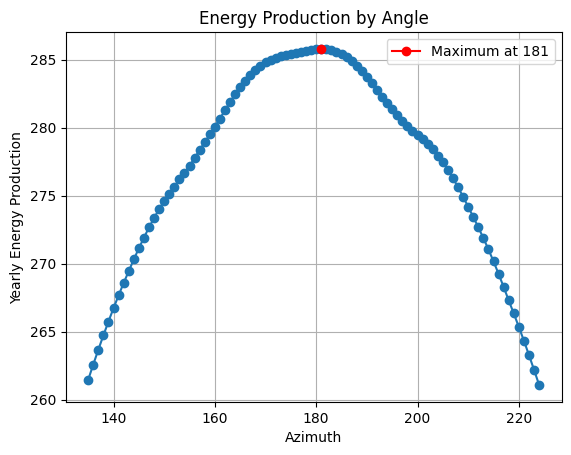

In [ ]:
def find_flux_pr_asimut_år(asi):
    asi_flux_dict = {}
    dx = 3600
    deg = 51
    prodoction =()
    flux_2024 = find_flux(solpos_år, deg, asi)
    production = round(integrate.simps(flux_2024,dx=dx)*A_0*S_0*Wp/LB/1000/3600,2)
    return asi,production

asi = []
production = []

for i in (range(135,225)):
    a,p = find_flux_pr_asimut_år(i)
    asi.append(a)
    production.append(p)

print(asi,production)
print(asi[np.argmax(production)],max(production))

# Plot
plt.plot(asi, production, marker='o', linestyle='-')
plt.plot(181, max(production), marker='o', color='red', label='Maximum at 181')

# Adding labels and title
plt.xlabel('Azimuth')
plt.ylabel('Yearly Energy Production')
plt.title('Energy Production by Angle')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

# 26.

In [ ]:

start_date_year = "2024-01-01"
end_date_year = "2024-12-31"

# Function to calculate hourly power generated
def find_kWh_hourly(asi,zenit,len,bred,location):

    #calculate how many panels
    n_l = (len-1)//l_panel
    n_b = (bred-0.6)//h_panel
    n = n_l*n_b

    daily_energy = []
    Daily_kWh_dict = {}  # Dictionary to store hourly power generated
    dx = 60  # Integration step size in seconds (one minute)
    for single_date in pd.date_range(start=start_date_year, end=end_date_year, freq="D", tz="Europe/Copenhagen"): # går igennem individuelle dage og deler op i timer
        start_time = single_date.strftime("%Y-%m-%d") + " 00:00:00"
        end_time = single_date.strftime("%Y-%m-%d") + " 23:59:59"

        # Generate time range for the hour
        time_hour = pd.date_range(start=start_time, end=end_time, freq="Min", tz="Europe/Copenhagen", ambiguous="NaT") # laver en range med minutter for hver dag

        # Get solar position for the hour
        solpos_hour = location.get_solarposition(time_hour) # henter data for solens position for hvert minut

        # Calculate flux for the hour
        flux_hour = find_flux(solpos_hour, asi, zenit) #finder fluxen for hvert minut

        # Integrate to find total energy for the day
        integrate_value = integrate.simps(flux_hour, dx=dx)*A_0*S_0*Wp/LB*n/1000/3600  # Converter Ws/m^2 til kWh

        # Store total energy in daily_flux_dict
        Daily_kWh_dict[single_date.strftime("%Y-%m-%d")] = integrate_value # smækker det i et dictionary


    total_energy = sum(Daily_kWh_dict.values())  # Calculate total energy generated
    max_energy = max(Daily_kWh_dict.values())  # Find maximum hourly energy generated
    daily_energy=Daily_kWh_dict.values()

    return Daily_kWh_dict, total_energy, max_energy, daily_energy,n

Daily_kWh_dict, total_energy, max_energy, daily_energy,n = find_kWh_hourly(51,180,12,4.5,location)
print("Hourly power generated for each hour:", Daily_kWh_dict)
print("Total energy generated for the year:", total_energy)
print("Maximum daily energy generated:", max_energy)
print("Antal paneler der kan installeres:",n)

#plot
days = pd.date_range(start=start_date_year, end=end_date_year, freq="D", tz="Europe/Copenhagen")
plt.plot(days, daily_energy, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Energy Production')
plt.title('Daily Energy Production')

# Display the plot
plt.grid(True)
plt.show()


NameError: name 'l_panel' is not defined

## Udvidelse

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel("elpris.xlsx")
kwh_d = 5000/365
sommer_d = kwh_d*0.85
vinter_d = kwh_d*1.15
# Hvor relativt meget man bruger energi på tidspunkt af døgnet
timer = np.array([1,1,1,1,1,1.5,2,1.5,1.5,1.5,1.5,1.5,1.5,1.5,4,2,2,2,1.5,1,5,1,1,1])
# Spreder en sommerdags produktion ud på timerne

sommer_timer = timer*sommer_d/sum(timer)
vinter_timer = timer*vinter_d/sum(timer)

april = 2186 # 1. april = 2186
oktober = 6578 # 1. oktober = 6578
df_sommer = df.iloc[april:oktober] #Sommer dataframe
df_vinter = pd.concat([df.iloc[:april],df.iloc[oktober:]]) #Vinter dataframe

num_days_sommer = len(df_sommer) // 24
num_days_vinter = len(df_vinter) // 24

# Gentag tiderne for hver sommerdag
sommer_timer_repeated = np.tile(sommer_timer, num_days_sommer)
vinter_timer_repeated = np.tile(vinter_timer, num_days_vinter)

# Hvor mange penge vi bruger hver time
df_sommer['dkk'] = df_sommer['Med moms']/1000 * sommer_timer_repeated #omregner 'med moms' fra dkk/MWh til dkk/kWh og sommer_timer_repeated er i kWh
df_vinter['dkk'] = df_vinter['Med moms']/1000 * vinter_timer_repeated

In [ ]:
start_dato_år = "2020-01-01"
slut_dato_år = "2020-12-31"

time_år = pd.date_range(
    start_dato_år + " 00:00:00", slut_dato_år + " 23:59:59", freq="H", inclusive="left", tz="Europe/Copenhagen"
)
lat = 55.786256
lon = 12.523167
time = "Europe/Copenhagen"
alt = 40
location = pvlib.location.Location(lat,lon,time,alt,"DTU-101")
solpos_år = location.get_solarposition(time_år)

def find_flux(solpos,theta_p,phi_p):
  flux_list = []
  z,a = solpos["apparent_zenith"],solpos["azimuth"]
  if z > 90:
    flux_list.append(0)
  else:
    flux_list.append(solar_panel_projection(np.deg2rad(z),np.deg2rad(a),np.deg2rad(theta_p),np.deg2rad(phi_p)))
  return flux_list

In [ ]:
#Tilføjer zenith og azimuth til hver time hver dag
df_sommer["apparent_zenith"] = solpos_år["apparent_zenith"].iloc[april:oktober].values
df_sommer["azimuth"] = solpos_år["azimuth"].iloc[april:oktober].values
df_vinter["apparent_zenith"] = solpos_år.iloc[:7824].drop(solpos_år.index[april:oktober])["apparent_zenith"].values
df_vinter["azimuth"] = solpos_år.iloc[:7824].drop(solpos_år.index[april:oktober])["azimuth"].values

In [ ]:
theta_range = range(25, 65, 2)
phi_range = range(130, 230, 5)
A_0 = 0.5
S_0 = 1.1
W = 400 #Vores panel der giver 400W
panel = 1.89*1.046 # paneler med disse dimensioner

df_generated = pd.DataFrame()

# find flux for hver række og vinkel
def compute_flux(row):
    results = {}
    for theta in theta_range:
        for phi in phi_range:
            name = f"t-{theta} p-{phi}"
            flux = find_flux(row, theta, phi)[0] # Hvor ortogonal er solens stråler på panelet
            flux = flux* S_0*A_0*W*12/panel/1000 # Gang med panelets effekt og konstanterne og ændre til kWh
            results[name] = flux
    return pd.Series(results)

df_total = pd.concat([df_sommer,df_vinter])
df_total.reset_index(inplace=True, drop=True) # Reset index til kronologisk rækkefølge
df_generated = df_total.apply(compute_flux, axis=1) # Hvor mange kWh producerer vores paneler

# Hvor mange penge vi sparer/tjener ud fra vores eget forbrug
df_generated = df_generated.mul(df_total["Med moms"]/1000, axis=0) # med moms er i dkk/MWh

# Laver en række med totale pris vores strøm er værd
df_generated.loc["Total"] = df_generated.sum()

In [ ]:
print(f"Den opsætning med den største pris: {df_generated.loc['Total'].idxmax()}")
print(f"Penge vi bruger på et år: {round(df_total['dkk'].sum(),2)}DKK")
print(f"Penge vi har sparer: {round(df_generated.loc['Total'].max(),2)}DKK")

**Endelig funktion**

In [ ]:
# 15
import pandas as pd
import pvlib
from pvlib.location import Location
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import integrate

A_0 = 0.5
S_0 = 1.1
Wp = 400 #Vores panel der giver 400W
LB = 1.046*1.890 #Længde bredde
h_panel = 1.890
l_panel = 1.046

# Byg 101 koordinater
lat = 55.786256
lon = 12.523167
time = "Europe/Copenhagen"
alt = 40
location = pvlib.location.Location(lat,lon,time,alt,"DTU-101")


def np_dot(v1, v2):
    return np.sum(v1 * v2, axis=0)

def solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel):
    #r_s = 149.60 * 10**6 # radius (afstand fra jorden til solen)
    r_s = 1

    # Enhedsnormalvektor, sol
    u_s = np.array([
        r_s * np.sin(theta_sol) * np.cos(phi_sol),
        r_s * np.sin(theta_sol) * np.sin(phi_sol),
        r_s * np.cos(theta_sol)
    ])

    # Enhedsnormalvektor, panel
    u_p = np.array([
        np.sin(theta_panel) * np.cos(phi_panel),
        np.sin(theta_panel) * np.sin(phi_panel),
        np.cos(theta_panel)
    ])

    return np.maximum(0, np_dot(u_s, u_p))


def find_flux(solpos,theta_p,phi_p):
  flux_list = []
  for z,a in zip(solpos["zenith"],solpos["azimuth"]):
    if z > 90:
      flux_list.append(0)
    else:
      flux_list.append(solar_panel_projection(np.deg2rad(z),np.deg2rad(a),np.deg2rad(theta_p),np.deg2rad(phi_p)))
  return flux_list



start_date_year = "2024-01-01"
end_date_year = "2024-12-31"

# Function to calculate hourly power generated
def find_kWh_hourly(asi,zenit,len,bred,location):

    #calculate how many panels
    n_l = (len-1)//l_panel
    n_b = (bred-0.6)//h_panel
    n = n_l*n_b

    daily_energy = []
    Daily_kWh_dict = {}  # Dictionary to store hourly power generated
    dx = 60  # Integration step size in seconds (one minute)
    for single_date in pd.date_range(start=start_date_year, end=end_date_year, freq="D", tz="Europe/Copenhagen"): # går igennem individuelle dage og deler op i timer
        start_time = single_date.strftime("%Y-%m-%d") + " 00:00:00"
        end_time = single_date.strftime("%Y-%m-%d") + " 23:59:59"

        # Generate time range for the hour
        time_hour = pd.date_range(start=start_time, end=end_time, freq="Min", tz="Europe/Copenhagen", ambiguous="NaT") # laver en range med minutter for hver dag

        # Get solar position for the hour
        solpos_hour = location.get_solarposition(time_hour) # henter data for solens position for hvert minut

        # Calculate flux for the hour
        flux_hour = find_flux(solpos_hour, asi, zenit) #finder fluxen for hvert minut

        # Integrate to find total energy for the day
        integrate_value = integrate.simps(flux_hour, dx=dx)*A_0*S_0*Wp/LB*n/1000/3600  # Converter Ws/m^2 til kWh

        # Store total energy in daily_flux_dict
        Daily_kWh_dict[single_date.strftime("%Y-%m-%d %H:%M:%S")] = integrate_value # smækker det i et dictionary


    total_energy = sum(Daily_kWh_dict.values())  # Calculate total energy generated
    max_energy = max(Daily_kWh_dict.values())  # Find maximum hourly energy generated
    daily_energy=Daily_kWh_dict.values()

    return Daily_kWh_dict, total_energy, max_energy, daily_energy,n


#finder de vinkler der giver optimal total produktion
total_energy_list=[]

for i in range(30,60):
  for j in range(140,220):
      Daily_kWh_dict, total_energy, max_energy, daily_energy,n = find_kWh_hourly(i,j,12,4.5,location)
      total_energy_list.append(total_energy)
      if total_energy == max(total_energy_list):
        j_opt,i_opt = j,i

Daily_kWh_dict, total_energy, max_energy, daily_energy,n = find_kWh_hourly(i_opt,j_opt,12,4.5,location)

print("Hourly power generated for each hour:", Daily_kWh_dict)
print("Total energy generated for the year:", total_energy)
print("Maximum daily energy generated:", max_energy)
print("Antal paneler der kan installeres:",n)
print(f"Den optimale instalation har azumithvinkel: {i_opt} og zenithvinkel: {j_opt}")

#plot
days = pd.date_range(start=start_date_year, end=end_date_year, freq="D", tz="Europe/Copenhagen")
plt.plot(days, daily_energy, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Energy Production')
plt.title('Daily Energy Production')

# Display the plot
plt.grid(True)
plt.show()
